<a href="https://www.kaggle.com/code/abhaykhamkar37/black-friday-abhay-khamkar?scriptVersionId=138750512" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


In [2]:
df=pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [3]:
#information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
#checking null values in each columns
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

checking all columns unique values

In [5]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [6]:
df['User_ID'].nunique()

5891

In [7]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [8]:
df['Product_ID'].nunique()

3631

In [9]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [10]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [12]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [13]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [14]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

cleaning work

In [15]:
#replace F with female and M with Male
df['Gender']=df['Gender'].replace('M','Male')
df['Gender']=df['Gender'].replace('F','Female')

In [16]:
#replace 55+ with 55-60 age group
df['Age']=df['Age'].replace('55+','55-60')

In [17]:
#replace 4+ with 4 year and convert it into int from 
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

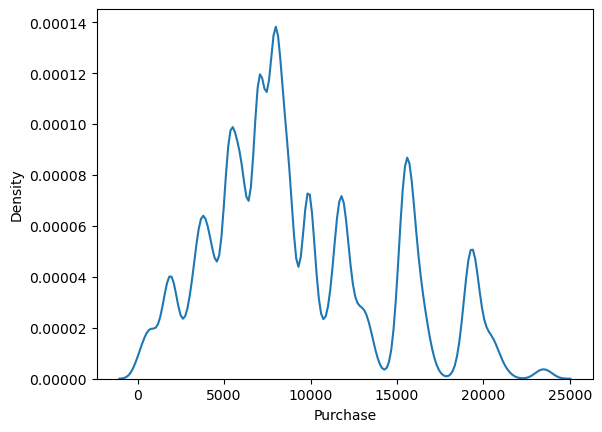

In [19]:
# kde plot of'Purchase' 
sns.kdeplot(df['Purchase'])

fill up 'nan' value with 0.0 'Product_Category_2'column

In [20]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df['Product_Category_2']=df['Product_Category_2'].replace(np.nan,0.0)

fill up 'nan' value with 0.0 in 'Product_Category_3'column

In [22]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
df['Product_Category_3']=df['Product_Category_3'].replace(np.nan,0.0)

checking that all nan values is get filled or not

In [24]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [25]:
#example of maping
df['Gender'].map({'Female':0,'Male':1})

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int64

In [26]:
# maping 'Age'column
# '0-17':'child'
# '18-25':'teen'
# '26-35':'adult'
# '36-45':'adult'
# '46-50':'adult'
# '51-55':'old'
# '55-60':'old'
df['Age']=df['Age'].map({'0-17':'child','18-25':'teen','26-35':'adult','36-45':'adult','46-50':'adult','51-55':'old','55-60':'old'})

data after cleaning 

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,Female,child,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,Female,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,Female,child,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,Female,child,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,Male,old,16,C,4,0,8,0.0,0.0,7969


In [28]:
df['User_ID'].nunique()


5891


#DataVisualization 

<AxesSubplot:ylabel='Density'>

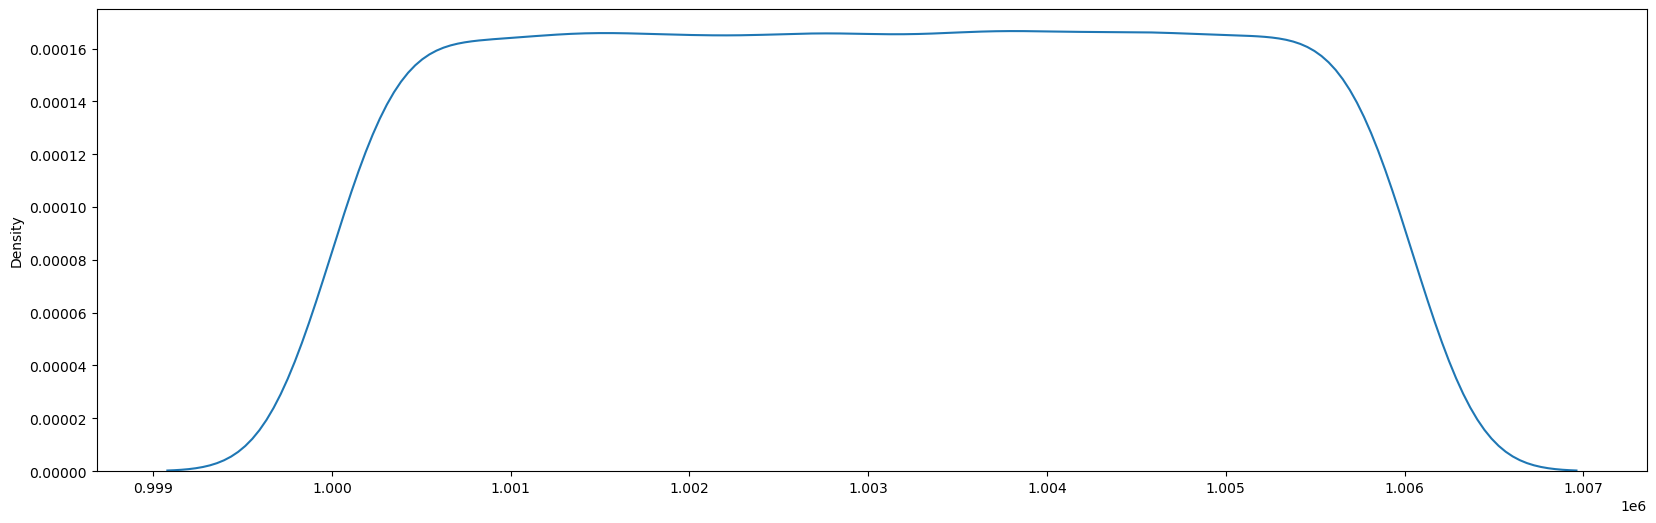

In [29]:
#kde plot of 'User_ID'
plt.figure(figsize=(20,6))
# plt.xticks(rotation=90)
sns.kdeplot(df['User_ID'].unique())

In [30]:
# plt.figure(figsize=(20,6))
# sns.countplot(x=df['Product_ID'].unique())

merge 10 plot by using subplot 

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

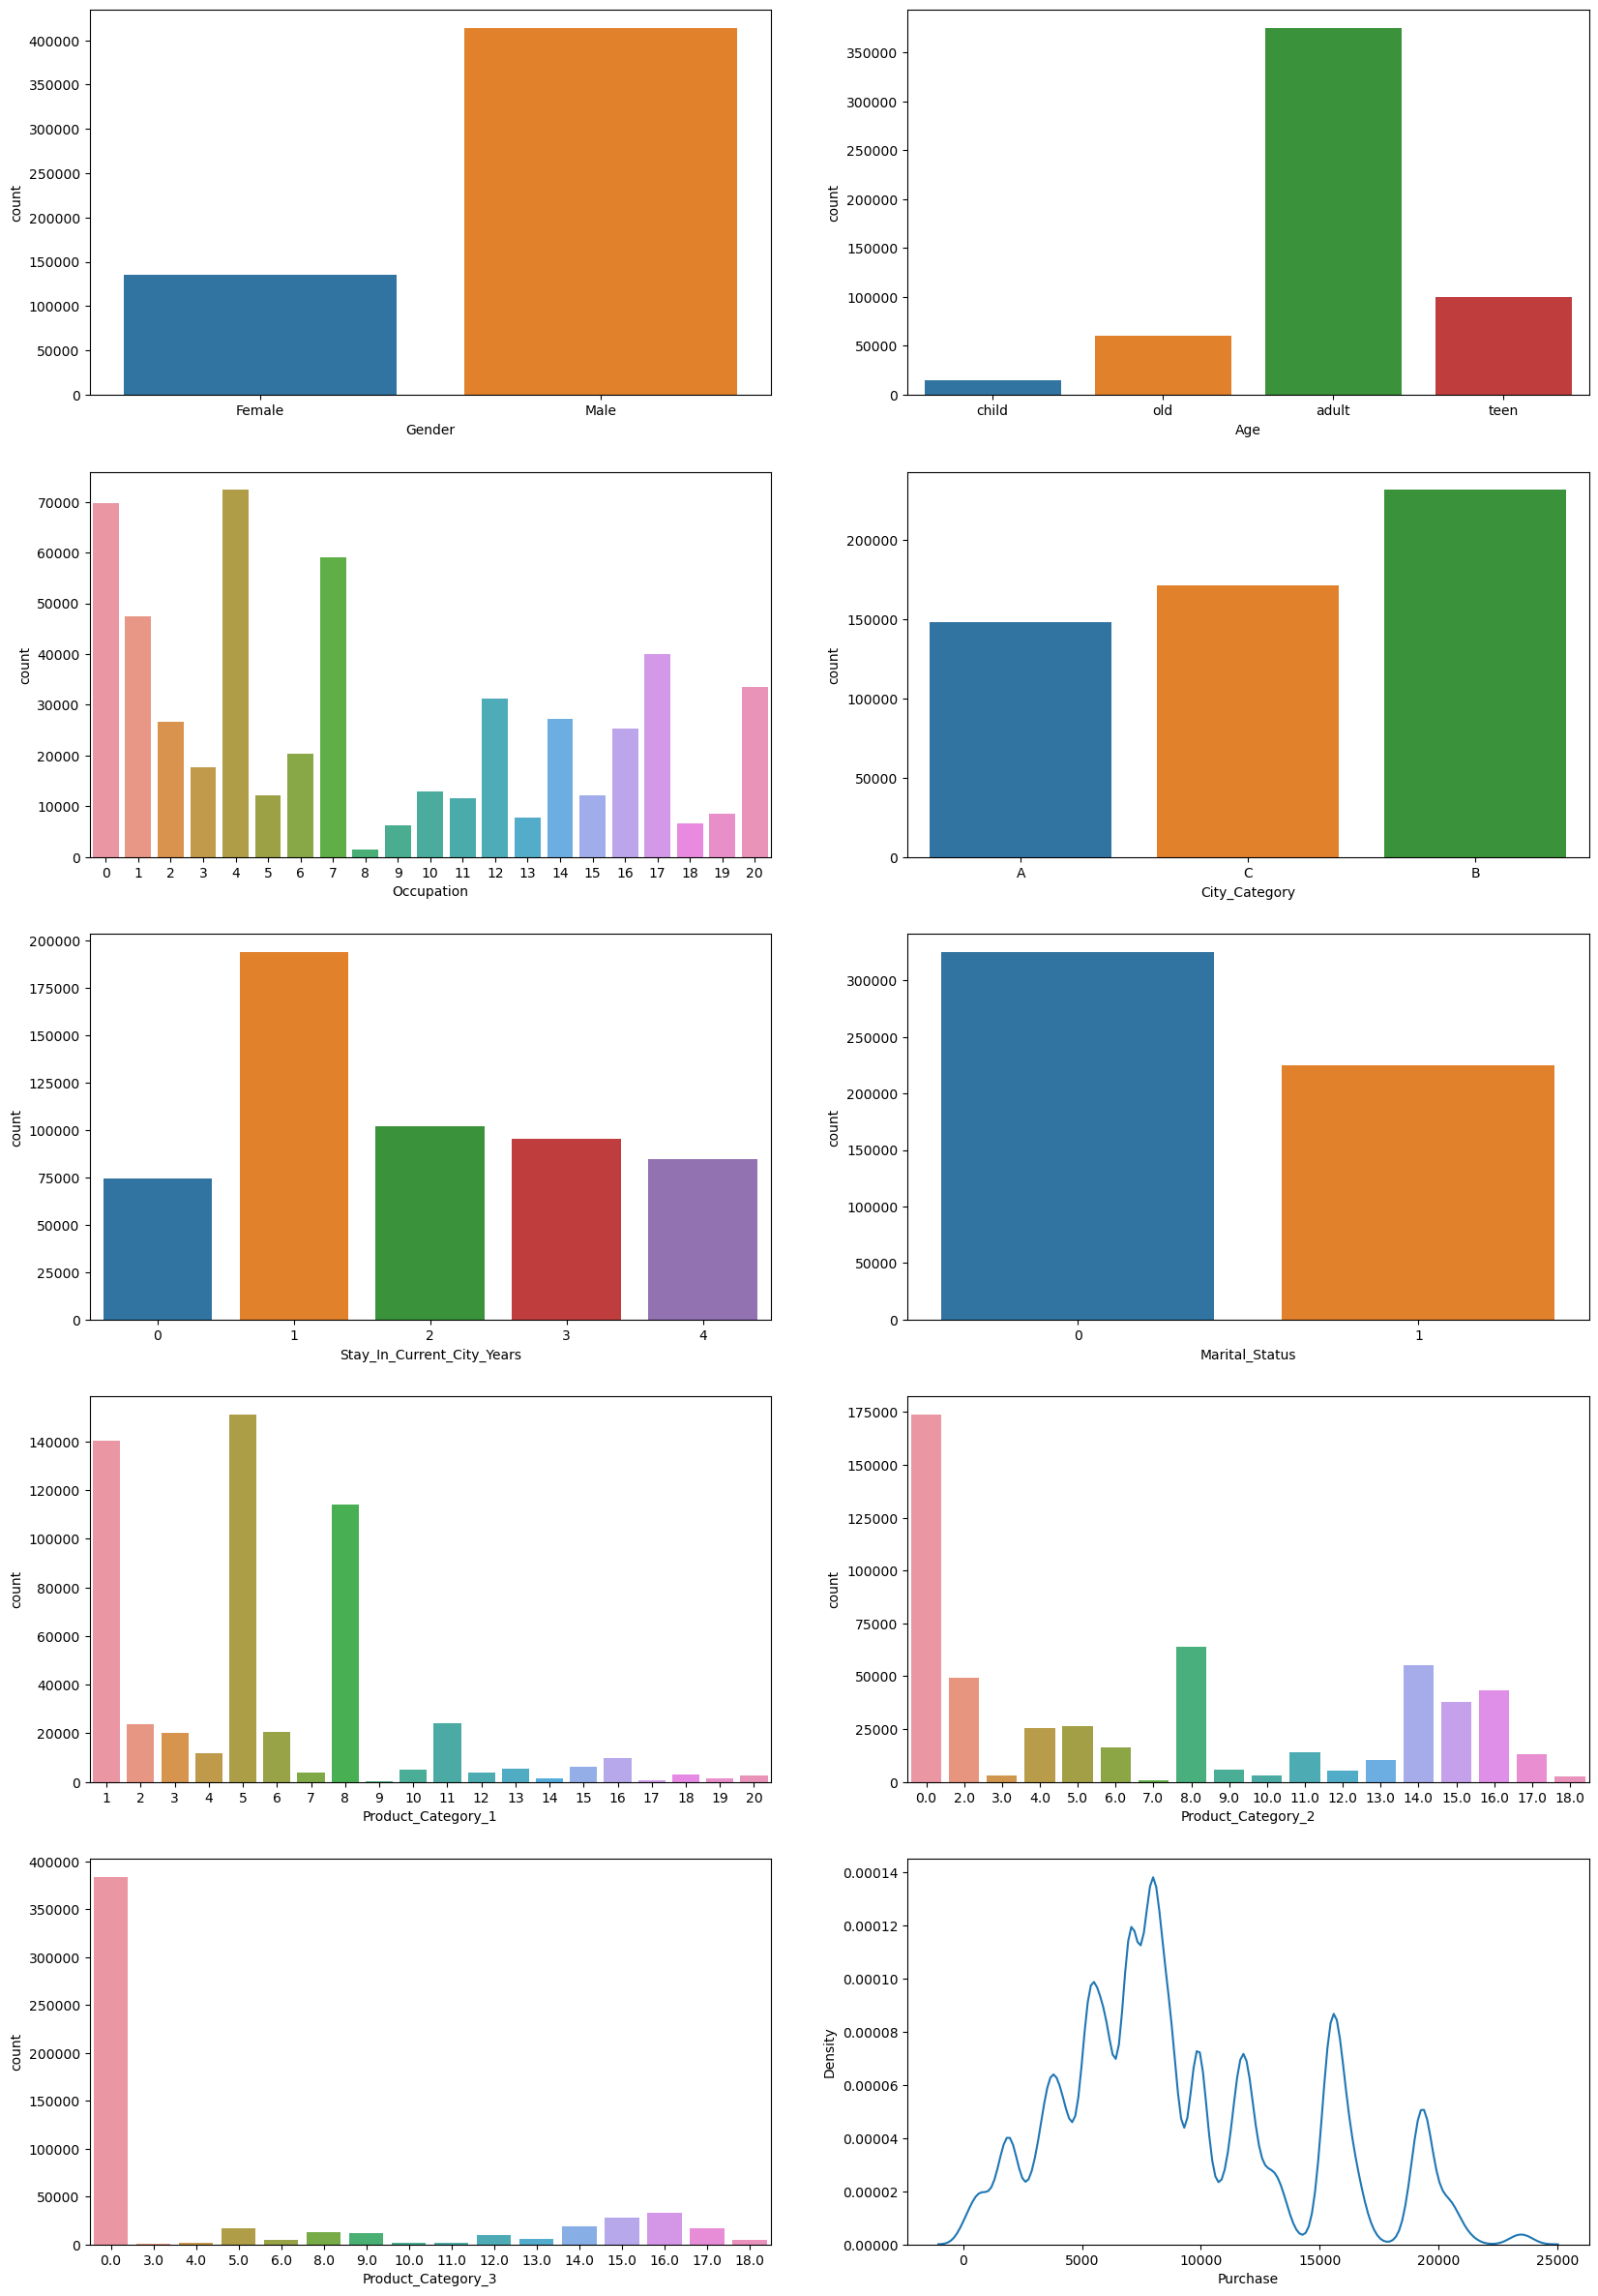

In [31]:
#1.'Gender' countplot
plt.figure(figsize=(20,30))
plt.subplot(5,2,1)
sns.countplot(x='Gender',data=df)

#2.'Age' countplot
plt.subplot(5,2,2)
sns.countplot(x='Age',data=df)

#3.'Occupation' countplot
plt.subplot(5,2,3)
sns.countplot(x='Occupation',data=df)

#4.'City_Category' countplot
plt.subplot(5,2,4)
sns.countplot(x='City_Category',data=df)

#5.'Stay_In_Current_City_Years' countplot
plt.subplot(5,2,5)
sns.countplot(x='Stay_In_Current_City_Years',data=df)

#6.'Marital_Status' countplot
plt.subplot(5,2,6)
sns.countplot(x='Marital_Status',data=df)

#7.'Product_Category_1' countplot
plt.subplot(5,2,7)
sns.countplot(x='Product_Category_1',data=df)

#8.'Product_Category_2' countplot
plt.subplot(5,2,8)
sns.countplot(x='Product_Category_2',data=df)

#9.'Product_Category_3' countplot
plt.subplot(5,2,9)
sns.countplot(x='Product_Category_3',data=df)

#10.'Purchase ' kdetplot
plt.subplot(5,2,10)
sns.kdeplot(x='Purchase',data=df)

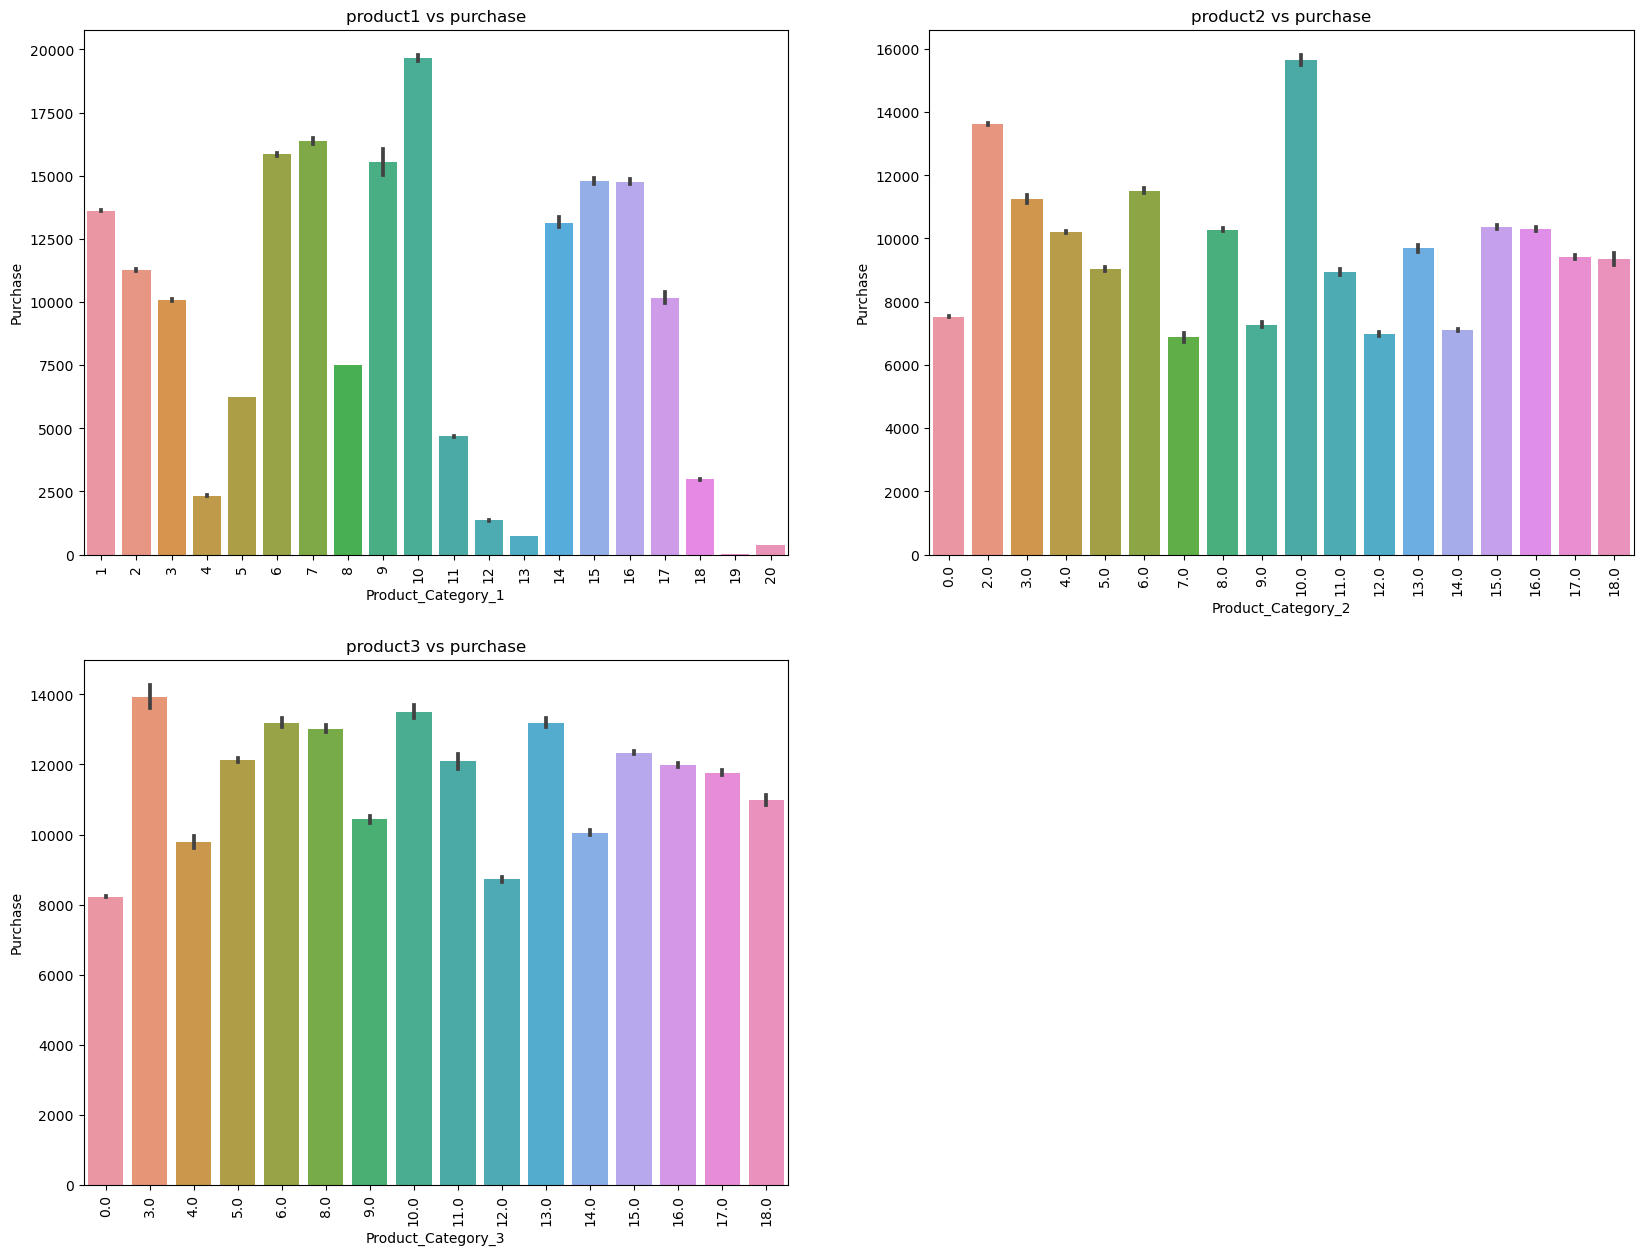

In [32]:
#Product_category_1 vs Purchased
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('product1 vs purchase')
sns.barplot(x='Product_Category_1',y='Purchase',data=df)
plt.xticks(rotation=90);

#Product_category_2 vs Purchased
plt.subplot(2,2,2)
plt.title('product2 vs purchase')
sns.barplot(x='Product_Category_2',y='Purchase',data=df)
plt.xticks(rotation=90);

#Product_category_3 vs Purchased
plt.subplot(2,2,3)
plt.title('product3 vs purchase')
sns.barplot(x='Product_Category_3',y='Purchase',data=df)
plt.xticks(rotation=90);

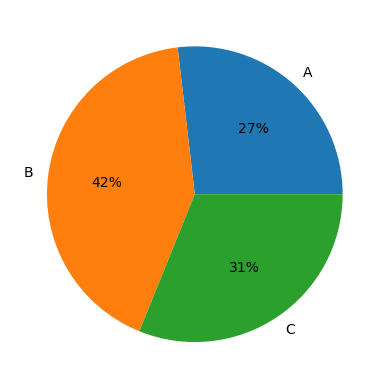

In [33]:
#pie chart of 'City_Category' with percentage of each category 
b=df.groupby('City_Category')['City_Category'].agg('count')
plt.pie(b,labels=b.index,autopct='%.0f%%');